In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from util import plot_decision_boundary

In [2]:
np.random.seed(10)

# create the data
N = 500
D = 2
X = np.random.randn(N, D)

# 2 gaussians
# sep = 1.5
# X[:N/2] += np.array([sep, sep])
# X[N/2:] += np.array([-sep, -sep])
# Y = np.array([0]*(N/2) + [1]*(N/2))

In [3]:
# noisy XOR
sep = 2
X[:125] += np.array([sep, sep])
X[125:250] += np.array([sep, -sep])
X[250:375] += np.array([-sep, -sep])
X[375:] += np.array([-sep, sep])
Y = np.array([0]*125 + [1]*125 + [0]*125 + [1]*125)

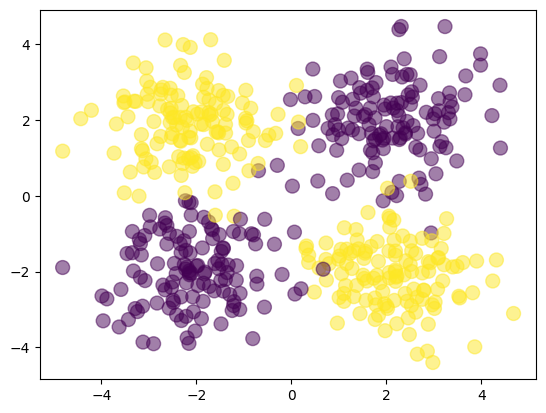

In [4]:
# plot the data
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()


In [5]:
# lone decision tree
model = DecisionTreeClassifier()
model.fit(X, Y)
print("score for 1 tree:", model.score(X, Y))

score for 1 tree: 1.0


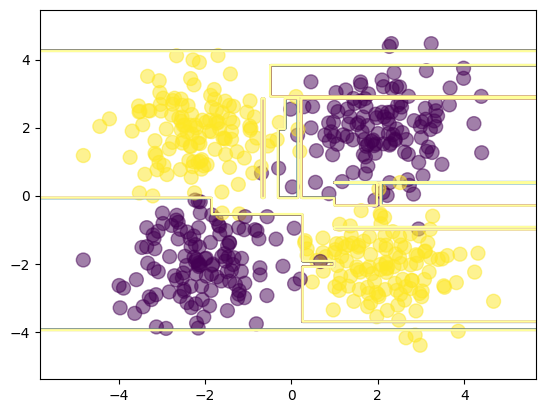

In [6]:
# plot data with boundary
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model)
plt.show()


In [7]:
# create the bagged model
class BaggedTreeClassifier:
  def __init__(self, B):
    self.B = B

  def fit(self, X, Y):
    N = len(X)
    self.models = []
    for b in range(self.B):
      idx = np.random.choice(N, size=N, replace=True)
      Xb = X[idx]
      Yb = Y[idx]

      model = DecisionTreeClassifier(max_depth=2)
      model.fit(Xb, Yb)
      self.models.append(model)

  def predict(self, X):
    # no need to keep a dictionary since we are doing binary classification
    predictions = np.zeros(len(X))
    for model in self.models:
      predictions += model.predict(X)
    return np.round(predictions / self.B)

  def score(self, X, Y):
    P = self.predict(X)
    return np.mean(Y == P)


In [8]:
model = BaggedTreeClassifier(200)
model.fit(X, Y)

print("score for bagged model:", model.score(X, Y))

score for bagged model: 0.968


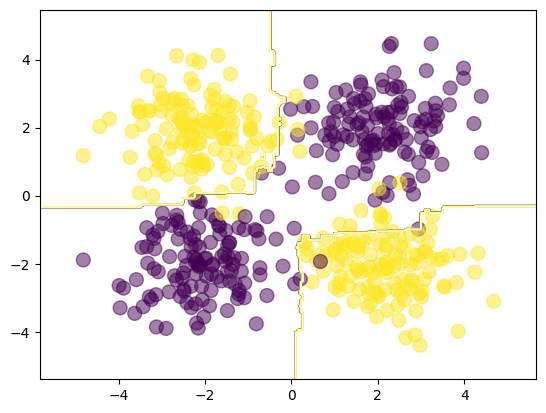

In [9]:
# plot data with boundary
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model)
plt.show()
